In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
years = list(range(1980, 2021))
pubs_renewable = [140, 188, 170, 168, 226, 167, 135, 119, 101, 122, 156, 190, 272, 279, 376, 284, 436, 384, 389, 401, 532, 777, 1008, 1427, 1689, 2074, 2414, 3452, 5256, 5668, 6058, 7671, 8972, 10101, 11362, 11656, 13625, 16024, 17999, 21173, 11916]
pubs_energy = [29414, 31114, 32080, 35418, 37805, 38063, 36245, 35611, 35488, 38651, 39565, 43342, 43732, 49231, 53558, 55163, 63704, 65268, 66079, 67623, 75352, 80184, 85835, 93293, 106902, 115845, 118515, 127306, 138525, 147398, 157844, 176052, 186907, 200520, 212975, 220282, 233189, 258110, 270728, 294170, 179887]

list(zip(years, pubs_renewable, pubs_energy))

[(1980, 140, 29414),
 (1981, 188, 31114),
 (1982, 170, 32080),
 (1983, 168, 35418),
 (1984, 226, 37805),
 (1985, 167, 38063),
 (1986, 135, 36245),
 (1987, 119, 35611),
 (1988, 101, 35488),
 (1989, 122, 38651),
 (1990, 156, 39565),
 (1991, 190, 43342),
 (1992, 272, 43732),
 (1993, 279, 49231),
 (1994, 376, 53558),
 (1995, 284, 55163),
 (1996, 436, 63704),
 (1997, 384, 65268),
 (1998, 389, 66079),
 (1999, 401, 67623),
 (2000, 532, 75352),
 (2001, 777, 80184),
 (2002, 1008, 85835),
 (2003, 1427, 93293),
 (2004, 1689, 106902),
 (2005, 2074, 115845),
 (2006, 2414, 118515),
 (2007, 3452, 127306),
 (2008, 5256, 138525),
 (2009, 5668, 147398),
 (2010, 6058, 157844),
 (2011, 7671, 176052),
 (2012, 8972, 186907),
 (2013, 10101, 200520),
 (2014, 11362, 212975),
 (2015, 11656, 220282),
 (2016, 13625, 233189),
 (2017, 16024, 258110),
 (2018, 17999, 270728),
 (2019, 21173, 294170),
 (2020, 11916, 179887)]

In [7]:
df_pub = pd.DataFrame({"years":years, "pubs_renewable":pubs_renewable, "pubs_energy":pubs_energy})
df_pub["RE/E"] = df_pub["pubs_renewable"]/df_pub["pubs_energy"]*100
df_pub.head()

,years,pubs_renewable,pubs_energy,RE/E
0,1980,140,29414,0.475964
1,1981,188,31114,0.604230
2,1982,170,32080,0.529925
3,1983,168,35418,0.474335
4,1984,226,37805,0.597805


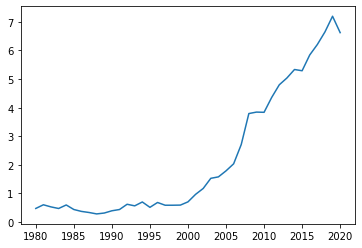

In [8]:
fig, ax = plt.subplots()
ax.plot(df_pub["years"], df_pub["RE/E"])

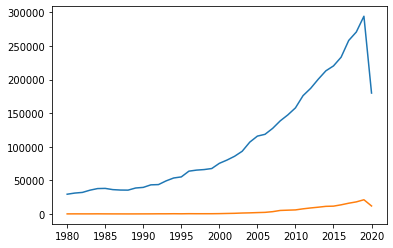

In [9]:
fig, ax = plt.subplots()
ax.plot(df_pub["years"], df_pub["pubs_energy"])
ax.plot(df_pub["years"], df_pub["pubs_renewable"])